## Movies Data Analysis ##
This jupyter notebook example shows use of Data Science techniques to analyse movie data, using MovieLens data (filename: ml-20m.zip) from the location https://grouplens.org/datasets/movielens/<br /><br />
I am using three CSV files from the downloaded data:
* **movies.csv :** *movieId*, *title*, *genres*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('./MLData/02_Movielens/ml-20m/movies.csv', sep=',')
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


### Data Structures: DataFrames ###

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags = pd.read_csv('./MLData/02_Movielens/ml-20m/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [5]:
ratings = pd.read_csv('./MLData/02_Movielens/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


For current analysis, we will remove timestamp (we will come back to it!).

In [6]:
del tags['timestamp']
del ratings['timestamp']

In [7]:
tags.head(3)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero


In [8]:
ratings.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [9]:
movies.shape

(27278, 3)

In [10]:
tags.shape

(465564, 3)

In [11]:
ratings.shape

(20000263, 3)

In [12]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [13]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

Extract row 0, 11, 2000 from DataFrame using index location **iloc**

In [14]:
tags.iloc[ [0,11,2000]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


In [15]:
movies.iloc[ [10, 50, 1500]]

,movieId,title,genres
10,11,"American President, The (1995)",Comedy|Drama|Romance
50,51,Guardian Angel (1994),Action|Drama|Thriller
1500,1550,Trial and Error (1997),Comedy|Romance


### Data Structures: Series ###

In [16]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

Extract 0th row: notice that it is infact a Series

In [17]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [18]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [19]:
row_0['userId']

18

In [20]:
'rating' in row_0

False

In [21]:
row_0.name

0

In [22]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [23]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: first_row, dtype: object


### Descriptive Statistics ###
Using some of the useful functions in Pandas to generate descriptive data statistics.<br />
Let's look at how the ratings are distributed.

In [24]:
ratings.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [25]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [26]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [27]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [28]:
ratings['rating'].mean()

3.5255285642993797

In [29]:
ratings['rating'].min()

0.5

In [30]:
ratings['rating'].max()

5.0

In [31]:
ratings['rating'].std()

1.0519889192942424

In [32]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [33]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [34]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [35]:
filter_2 = ratings['rating'] < 1
filter_2.any()

True

In [36]:
type(filter_2)

pandas.core.series.Series

In [37]:
filter_2.head()

0    False
1    False
2    False
3    False
4    False
Name: rating, dtype: bool

In [38]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

### Data Cleaning: Handling Missing Data ###

In [39]:
movies.shape

(27278, 3)

Is any row has NULL value?

In [40]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [41]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [42]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

So the tags table has some missing values in the tag column.

In [43]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [44]:
tags.shape

(465564, 3)

So in tags table out of 465564 rows, 16 rows have missing values, which is a small number in comparision to 465564 rows. So we can drop those 16 rows.

In [45]:
tags = tags.dropna()

In [46]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [47]:
tags.shape

(465548, 3)

So 465564 - 465548 = 16 rows are now removed with no null rows left.

### Data Visualisation ###

Pandas library has very useful data visualisation plot functions as the following:
* **DataFrame.plot()** : Line graphs of each column with different line.
* **DataFrame.plot.area()** : Gives area plot
* **DataFrame.plot.bar()** : Gives vertical bars for each columns
* **DataFrame.plot.barh()** : Gives horizontal bars for each columns
* **DataFrame.plot.box()** : Gives box plot of data distribution of min, max, and medium values for columns.
* **DataFrame.plot.density()** : Gives Kernel Density Estimate plot
* **DataFrame.plot.hexbin()** : Gives Hexbin plot
* **DataFrame.plot.hist()** : Gives a histogram of distribution of data, and it can show skewness of data.
* **DataFrame.plot.kde()** : Same as Kernel Density Estimate plot 
* **DataFrame.plot.line()** : Gives simple line plot
* **DataFrame.plot.pie()** : Gives Pie chart
* **DataFrame.plot.scatter()** : Gives Scatter plot
* **DataFrame.boxplot()** : Gives a box plot from DataFrame columns
* **DataFrame.hist()** : Gives a histogram from the DataFrame columns

**Matplotlib** is a plotting library for Python and Pandas leverages matplotlib underneath for its plots. For jupyter to plot the graphs inside the notebooks we have to tell jupyter to plot **inline**. The percentage sign before the matplotlib is a symbol for a special class of functions in jupyter called magic functions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D9127518>]],
      dtype=object)

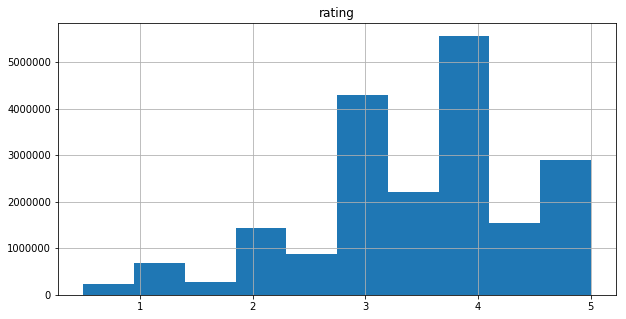

In [48]:
%matplotlib inline
ratings.hist(column='rating', figsize=(10,5))

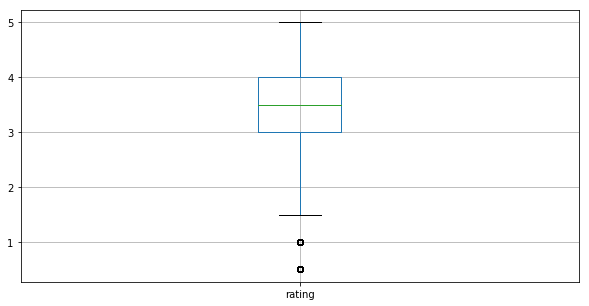

In [49]:
ratings.boxplot(column='rating', figsize=(10,5))

### Slicing Out Columns ###

In [50]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [51]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [52]:
ratings[:5]

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [53]:
ratings[-5:]

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [54]:
ratings[1000:1005]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0


In [55]:
# Count of movies per tag in the tag database
tag_counts = tags['tag'].value_counts()
tag_counts[:5]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
Name: tag, dtype: int64

Show only rows from tags DataFrame with tag value as "sci-fi".

In [56]:
scifi = tags.loc[tags['tag'] == 'sci-fi']
scifi.head(5)

,userId,movieId,tag
162,129,4878,sci-fi
259,190,2011,sci-fi
303,318,260,sci-fi
386,342,2571,sci-fi
438,342,8914,sci-fi


In [57]:
comedy = tags.loc[tags['tag'] == 'comedy']
comedy.head(5)

,userId,movieId,tag
56,121,1288,comedy
84,121,35836,comedy
113,121,60756,comedy
170,129,8528,comedy
336,342,750,comedy


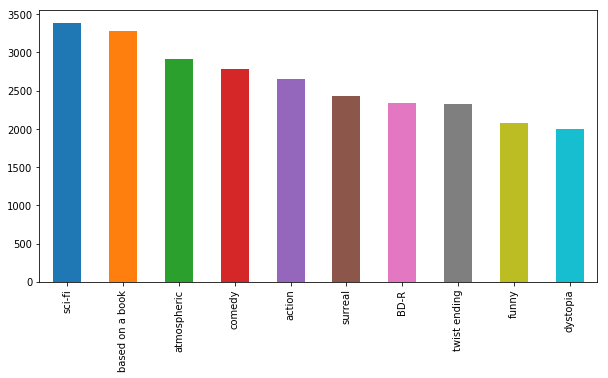

In [58]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

More movies are made within sci-fi genere, followed by based on a book.

### Filters for Selecting Rows ###

In [59]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated][90:95]

,userId,movieId,rating
177,2,70,5.0
178,2,110,4.0
180,2,260,5.0
181,2,266,5.0
183,2,480,5.0


In [60]:
is_lowly_rated = ratings['rating'] <= 2.0
ratings[is_lowly_rated][15:20]

,userId,movieId,rating
415,3,2986,2.0
426,4,32,1.0
456,5,104,2.0
458,5,140,2.0
461,5,224,2.0


In [61]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation][10:15]

,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [62]:
is_scifi = movies['genres'].str.contains('Sci-Fi')
movies[is_scifi][10:15]

,movieId,title,genres
196,198,Strange Days (1995),Action|Crime|Drama|Mystery|Sci-Fi|Thriller
206,208,Waterworld (1995),Action|Adventure|Sci-Fi
253,256,Junior (1994),Comedy|Sci-Fi
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
270,273,Mary Shelley's Frankenstein (Frankenstein) (1994),Drama|Horror|Sci-Fi


In [63]:
movies[is_scifi].head(5)

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
75,76,Screamers (1995),Action|Sci-Fi|Thriller


### Group By and Aggregate ###

In [64]:
# Count of movies for each rating 
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [65]:
#  Average rating for every movie in our ratings database
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [66]:
# To see how many ratings are present per movie
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


### Merge DataFrames ###
Details in: http://pandas.pydata.org/pandas-docs/stable/merging.html<br /><br />
<u>Note:</u> Using **merge()** is better than using concat() or append() as merge() eliminates duplicate keys.

In [67]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [69]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [70]:
movtags = movies.merge(tags, on='movieId', how='inner')
del movtags['userId']
movtags.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,TÃ©a Leoni does not star in this movie


Combine aggreagation, merging, and filters to get useful analytics:

In [71]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [72]:
# First merging the movies table with the ratings table
box_off = movies.merge(ratings, on='movieId', how='inner')
del box_off['userId']
box_off.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [73]:
# Then merging the movies table with the avg_ratings dataframe in memory
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [74]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][:5]

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534


In [75]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [76]:
box_office[is_comedy & is_highly_rated][:5]

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.112359


### Vectorized String Operations ###
Split 'genres' into multiple columns like "**Comedy|Drama|Romance|War**" into "**Comedy**", "**Drama**", "**Romance**", and "**War**"

Main string operation functions are:
* str.split()
* str.contains()
* str.replace()
* str.extract()

In [77]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies title also have the year, and genres has more than one genre, all stringed together by pipe characters.

In [78]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:5]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


All the genres are split into a separate dataframe. Probably one of the rows has nine genres in it, which is why we have nine columns here.

In [79]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:5]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


Extract year from movie title e.g. separate "Toy Story" and "(1995)" so that year is extracted out.

In [80]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies[-5:]

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


### Parsing Timestamps ###
Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [81]:
tags2 = pd.read_csv('./MLData/02_Movielens/ml-20m/tags.csv', sep=',')
tags2.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [82]:
tags2.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Note that the datatype timestamp is **int64**.

This is a Unix time/POSIX time/epoch time format that records time in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

Our big task is to convert the int64, which was that original instant since 1970 UTC time, into either one of the datetime formats so Python renders it in a human-readable format.

In [83]:
tags2['parsed_time'] = pd.to_datetime(tags2['timestamp'], unit='s')
tags2['parsed_time'].dtype

dtype('<M8[ns]')

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

In [84]:
tags2.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


Selecting rows based on timestamps:

In [85]:
greater_than_t = tags2['parsed_time'] > '2015-02-01'
selected_rows = tags2[greater_than_t]
tags2.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [86]:
tags2[greater_than_t][:5]

,userId,movieId,tag,timestamp,parsed_time
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03


Sorting the table using the timestamps:

In [87]:
tags2.sort_values(by='parsed_time', ascending=True)[:5]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19


### Average Movie Ratings over Time ##
Let's find insight to this question - Are movie ratings related to the year of launch?

In [88]:
ratings.tail()

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [89]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [90]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.tail()

,movieId,title,genres,year,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,2007,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,4.0
26741,131258,The Pirates (2014),Adventure,2014,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),2001,3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,4.0


In [91]:
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [92]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[-10:]

,year,rating
114,2009,3.148238
115,2009–,5.000000
116,2010,3.131866
117,2011,3.162567
118,2012,3.104176
119,2013,3.145056
120,2014,3.122809
121,2015,2.813146
122,"Bicicleta, cullera, poma",3.000000
123,Das Millionenspiel,3.125000


In [93]:
yearly_average.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 2 columns):
year      124 non-null object
rating    124 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


Note that the year column has datatype as "**object**" as it has some unintended data like "*Das Millionenspiel*" or "*2009–*". This will create problem in graph plotting. So we need to clean these.

In [94]:
yearly_average['year'] = pd.to_numeric(yearly_average['year'], errors='coerce')
yearly_average[-10:]

,year,rating
114,2009.0,3.148238
115,NaN,5.000000
116,2010.0,3.131866
117,2011.0,3.162567
118,2012.0,3.104176
119,2013.0,3.145056
120,2014.0,3.122809
121,2015.0,2.813146
122,NaN,3.000000
123,NaN,3.125000


In [95]:
yearly_average.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 2 columns):
year      118 non-null float64
rating    124 non-null float64
dtypes: float64(2)
memory usage: 2.9 KB


In [96]:
yearly_average.isnull().sum()

year      6
rating    0
dtype: int64

In [97]:
yearly_average = yearly_average.dropna(axis=0)
yearly_average[-10:]

,year,rating
110,2006.0,3.163678
111,2007.0,3.130010
113,2008.0,3.157557
114,2009.0,3.148238
116,2010.0,3.131866
117,2011.0,3.162567
118,2012.0,3.104176
119,2013.0,3.145056
120,2014.0,3.122809
121,2015.0,2.813146


In [98]:
yearly_average.isnull().sum()

year      0
rating    0
dtype: int64

In [99]:
yearly_average['year'] = yearly_average['year'].astype('int64', errors='ignore')
yearly_average[-10:]

,year,rating
110,2006,3.163678
111,2007,3.130010
113,2008,3.157557
114,2009,3.148238
116,2010,3.131866
117,2011,3.162567
118,2012,3.104176
119,2013,3.145056
120,2014,3.122809
121,2015,2.813146


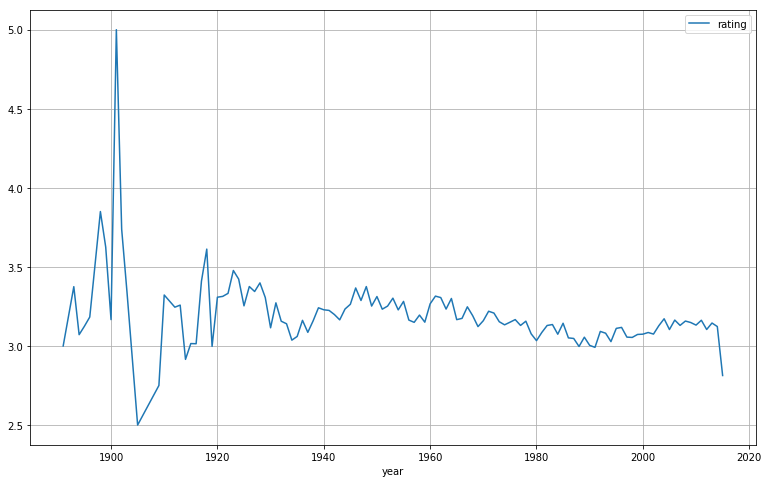

In [100]:
yearly_average[:].plot(x='year', y='rating', figsize=(13,8), grid=True)

Do some years look better for the boxoffice movies than others?<br/>
Yes, around the years 1900 and 1920, films used to get higher ratings.

Does any data point seem like an outlier in some sense?<br/>
No, as the ratings are well between 2.5 to 5.0, no data seems to be in outlier.